# Plots (graficas) y visualizacion de los datos

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
ruta="../Datasets/"
archivo="Customer_Churn_Model/Customer Churn Model.txt"

In [12]:
df=pd.read_csv(ruta+archivo)
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

In [47]:
df.describe()

Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.573847   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   166.600000    87.000000    14.160000   167.000000   
50%      30.500000   201.400000   100.000000    17.120000   201.200000   
75%      36.790000   235.300000   114.000000    20.000000   235.300000   
max      59.640000   363.700000   170.000000    30.910000   395.000000   

       Night Calls  Night Charge    Intl Mins   Intl Calls  Intl Charge  \
count  3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.107711      9.039325    10.237294     4.479448     2.764581   
std      19.568609      2.275873     2.791840     2.461214     0.753773   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.520000     8.500000     3.000000     2.300000   
50%     100.000000      9.050000    10.300000     4.000000     2.780000   
75%     113.000000     10.590000    12.100000     6.000000     3.270000   
max     175.000000     17.770000    20.000000    20.000000     5.400000   

       CustServ Calls  
count     3333.000000  
mean         1.562856  
std          1.315491  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

In [13]:
#savefig(PATH) Sirve para guardar el grafico actual

### Scatter Plot (Nube de puntos o de dispersion)

In [14]:
df.plot(kind="scatter",x="Day Mins",y="Day Charge")

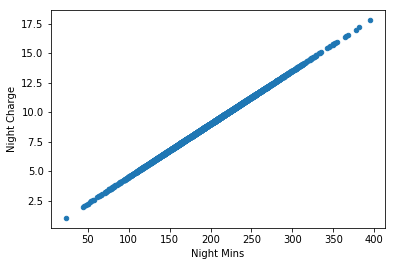

In [15]:
df.plot(kind="scatter",x="Night Mins",y="Night Charge")

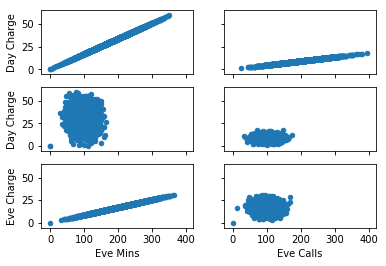

In [16]:
figure,graficas=plt.subplots(3,2, sharex=True, sharey=True)
df.plot(kind="scatter",x="Day Mins",y="Day Charge",ax=graficas[0][0])
df.plot(kind="scatter",x="Night Mins",y="Night Charge",ax=graficas[0][1])
df.plot(kind="scatter",x="Day Calls",y="Day Charge",ax=graficas[1][0])
df.plot(kind="scatter",x="Night Calls",y="Night Charge",ax=graficas[1][1])
df.plot(kind="scatter",x="Eve Mins",y="Eve Charge",ax=graficas[2][0])
df.plot(kind="scatter",x="Eve Calls",y="Eve Charge",ax=graficas[2][1])

## Histogramas de frecuencias

**Regla de Sturges:** Es utilizada para calcular el numero de intervalos que son necesarios para representar un conjunto de datos. Es una regla general (_1+log2(n)_) en donde n es la cantidad total de datos. **REF: **[Regla de Sturges](https://www.lifeder.com/regla-sturges/)

Text(0.5,1,'Histograma Numero de llamadas al dia')

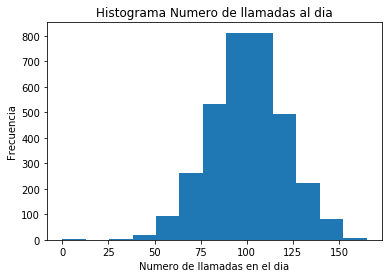

In [70]:
k=int(round(1+np.log2(df.shape[0]))) #Regla de Sturges
plt.hist(df['Day Calls'],bins=k)
plt.xlabel("Numero de llamadas en el dia")
plt.ylabel("Frecuencia")
plt.title("Histograma Numero de llamadas al dia")

## BoxPlot (Diagrama de caja y bigotes)

### Conceptos Estadisticos

* **Cuartil**: Son 3 valores que dividen a un conjunto de datos ordenado en partes porcentualmente iguales. [Cuartil](https://es.wikipedia.org/wiki/Cuartil)
* **Rango Intercuartilico (IQR)**: Es el valor de diferencia entre el tercer _cuartil_ y el primer _cuartil_. Tambien se le conoce, de forma coloquial, como el tamano de la caja en el BoxPlot. [Rango Intercuartilico](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico)

Text(0.5,1,'BoxPlot - llamadas diarias')

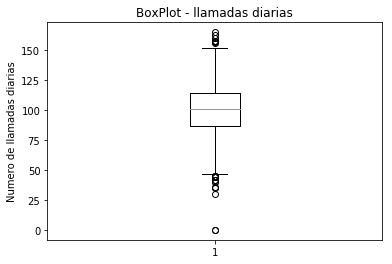

In [41]:
plt.boxplot(df['Day Calls'])
plt.ylabel("Numero de llamadas diarias")
plt.title("BoxPlot - llamadas diarias")

* **Caja**: La caja representa los Cuartiles 25%, 50%, 75%. Siendo el 25% la parte inferior y el 75% laparte superior.
* **Bigotes**: Los bigotes(las linea alrededor de la caja) representan 1.5 veces el IQR, lo que quiere decir que se multiplica 1.5 por el primer y tercer cuartil para obtener sus respectivas distancias. El primer cuartil es representado por el bigote inferior y el tercer cuartil se representa por el bigote superior.
* **Bolitas**: Son Valores que no entran en el IQR y por lo tanto nse represetna como Circulos.

In [62]:
df['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [74]:
#Se extrae el valor del cuartil solicitado
cuartil25=df["Day Calls"].quantile(0.25)
cuartil75=df["Day Calls"].quantile(0.75)
IQR=int(round(cuartil75-cuartil25))
print("IQR: "+str(IQR))

IQR: 27


In [76]:
print("Tope 25%: "+str(cuartil25-IQR*1.5))
print("Tope 50%: "+str(cuartil75+IQR*1.5))

Tope 25%: 46.5
Tope 50%: 154.5
